In [20]:
import sys
sys.path.append("../")

import pandas as pd

from model_analysis.roc_curve import get_roc_auc_data,split_test_set_by_binary_category, split_test_into_x_y
import data_exploration.visualisation_functions as vf 

from sklearn.metrics import roc_curve, auc

from bokeh.io import output_notebook, curdoc, export_svgs
from bokeh.plotting import show
from IPython.display import SVG, display

output_notebook()

Loading BokehJS ...

# Algorithmic Interventions

The aim will be to maximise profits while following the restrictions of each intervention. For comparison purposes, we will also look into the scenario, in which our only aim is to maximise profits while aware of the protected groups. That give us the following five scenarios as used in the Hardt et al. (2016) study:

- **_Maximise profit_** uses different classification thresholds for each group and only aims at maximising profit.
- **_Fairness through unawareness_** uses the same classification threshold for all groups while maximising profit.
- **_Demographic parity_** applies different classification thresholds for each group, while keeping the same fraction of positives in each group.
- **_Equal opportunity_** uses different classification thresholds for each group, while keeping the same true positive rate in each group.
- **_Equalised odds_** applies different classification thresholds for each group, while keeping the same true positive rate and false positive rate in each group.


# Results by Gender

As expected, profit is maximised when a different threshold is selected for each gender without any further restrictions. This can be seen through the yellow line in the max_profit label of the next four figures below. 

When looking at the breakdown of the true positive rate and false positive rate of each gender, we can notice that the profit level varies very little with exception to _Maximise Profits_ intervention. In that case, we can see that the model better classifies true positives for males (73%) than females (70%). However, it also grants a slightly higher proprotion of loans to people who will default to males (33.6%) than females (32%). We should also point out that more laons are granted under _Maximise Profits_ contributing to a higher profit|.

Under the _Equalised Odds_ algorithmic intervention, we can notice the strong drop in profits. This occurs due to more restrictive thresholds used. The thresholds for the female and male group were 0.56 and 0.55 respectively while the average threshold used across all interventions was 0.49 for females and 0.48 for males. We therefore see less loans granted under this intervention compared to the others.

## Model results for each fairness intervention

In [2]:
gender_results_df = pd.read_csv('../static/data/fairness_measures_by_gender.csv', 
                                index_col=[0]).reset_index(drop=True).round(3)

max_profits_gender = gender_results_df.loc[gender_results_df.groupby(['IntervationName'])['Profit'].idxmax()]  
max_profits_gender = max_profits_gender.sort_values('Profit', ascending=False)

max_profits_gender

,IntervationName,Profit,threshold_0,threshold_1,TruePositive0,FalsePositive0,PositiveRate0,NegativeRate0,TruePositiveRate0,FalsePositiveRate0,TruePositive1,FalsePositive1,PositiveRate1,NegativeRate1,TruePositiveRate1,FalsePositiveRate1
5183,MaxProfit,1096.8,0.47,0.46,787,280,0.534,0.466,0.700,0.320,1223,481,0.549,0.451,0.731,0.336
5186,EqualOpportunity,1094.6,0.47,0.47,787,280,0.534,0.466,0.700,0.320,1174,442,0.520,0.480,0.702,0.308
5185,GroupUnawareness,1094.6,0.47,0.47,787,280,0.534,0.466,0.700,0.320,1174,442,0.520,0.480,0.702,0.308
5393,DemographicParity,1094.4,0.49,0.47,776,271,0.524,0.476,0.690,0.310,1174,442,0.520,0.480,0.702,0.308
6129,EqualisedOdds,1061.4,0.56,0.55,673,196,0.435,0.565,0.598,0.224,1010,322,0.429,0.571,0.604,0.225


In [3]:
max_profits_gender[['threshold_0', 'threshold_1']].describe().loc[['mean', 'std']]

,threshold_0,threshold_1
mean,0.492000,0.484000
std,0.038987,0.037148


## True positive rate (TPR) and profit results for each gender based and fairness intervention 

In [21]:
p = vf.plot_dual_axis_bar_line(
    max_profits_gender, 
    title="Fraction of non-defaulters granted a loan by gender and corresponding profit",
    groups_name='IntervationName', 
    bar_target_name_variable0='TruePositiveRate0', 
    bar_target_name_variable1="TruePositiveRate1", 
    bar_variables=['female', 'male'], 
    line_target_name='Profit', 
    left_axis_y_label='Fraction non-defaulters getting loan', 
    right_axis_y_label='Profit')

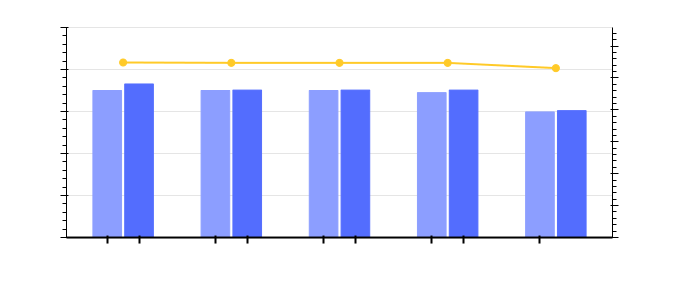

In [22]:
vf.save_plot(p, 'tpr_profit_gender')
display(SVG('../static/images/tpr_profit_gender.svg'))

## False positive rate (FPR) and profit results for each gender based and fairness intervention 

In [23]:
p = vf.plot_dual_axis_bar_line(
    max_profits_gender, 
    title="Fraction of defaulters granted a loan by gender and corresponding profit",
    groups_name='IntervationName', 
    bar_target_name_variable0='FalsePositiveRate0', 
    bar_target_name_variable1="FalsePositiveRate1", 
    bar_variables=['female', 'male'], 
    line_target_name='Profit', 
    left_axis_y_label='Fraction non-defaulters getting loan', 
    right_axis_y_label='Profit')

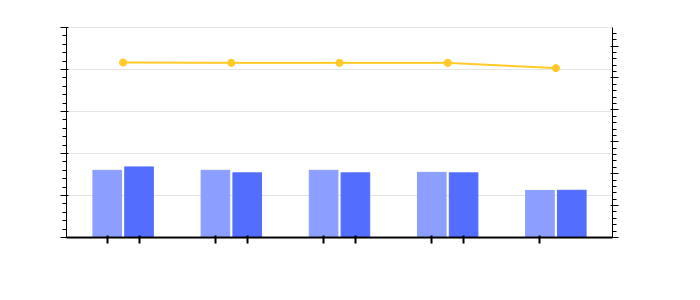

In [24]:
vf.save_plot(p, 'fpr_profit_gender')
display(SVG('../static/images/fpr_profit_gender.svg'))

## Positive Rate (PR) and profit results for each gender based and fairness intervention 

In [25]:
p = vf.plot_dual_axis_bar_line(
    max_profits_gender, 
    title="Fraction of people granted a loan by gender and corresponding profit",
    groups_name='IntervationName', 
    bar_target_name_variable0='PositiveRate0', 
    bar_target_name_variable1="PositiveRate1", 
    bar_variables=['female', 'male'], 
    line_target_name='Profit', 
    left_axis_y_label='Fraction non-defaulters getting loan', 
    right_axis_y_label='Profit')

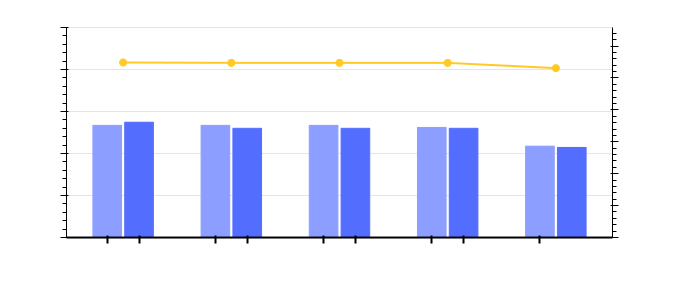

In [26]:
vf.save_plot(p, 'pr_profit_gender')
display(SVG('../static/images/pr_profit_gender.svg'))

## Negative Rate (NR) and profit results for each gender based and fairness intervention 

In [27]:
p = vf.plot_dual_axis_bar_line(
    max_profits_gender, 
    title="Fraction of people not granted a loan by gender and corresponding profit",
    groups_name='IntervationName', 
    bar_target_name_variable0='NegativeRate0', 
    bar_target_name_variable1="NegativeRate1", 
    bar_variables=['female', 'male'], 
    line_target_name='Profit', 
    left_axis_y_label='Fraction non-defaulters getting loan', 
    right_axis_y_label='Profit')

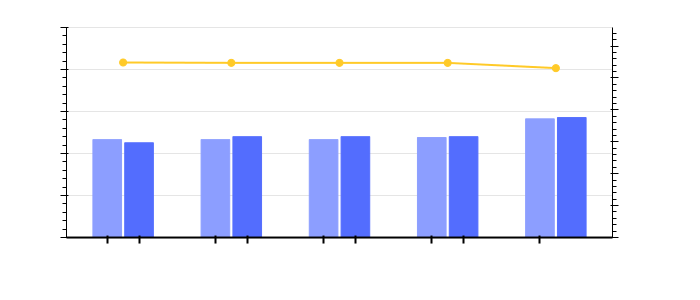

In [28]:
vf.save_plot(p, 'nr_profit_gender')
display(SVG('../static/images/nr_profit_gender.svg'))

# Results for Age 

## Model results for each fairness intervention

If we now look into age (see graphs and tables below), we can see that when we pick a common threshold for all groups in _group unawareness_, we tend to better classify loans to people who can pay back those over 40 than those under 40. The false positive rate remains about the same.

Under _demographic parity_, people under 40 (13%) are at a slightly higher risk of receiving a loan they cannot pay back compared to people over 40 (11%). The opposite occurs for _maximise profit_.

On the other hand, _equal opportunity_ as well as _equalised odds_ provide a better balance with regards to the trade-off between the true positive rate and false negative rate of each category in the group.

Nevertheless, profits decrease significantly in _equalised odds_ due to very restrictive thresholds leading to small false positive rates. The thresholds used for females was 0.83 and for males 0.81 while the average threshold used across all interventions was 0.69 for females and 0.68 for males. 


In [12]:
age_group_results_df = pd.read_csv('../static/data/fairness_measures_by_age_group.csv', 
                                index_col=[0]).reset_index(drop=True).round(2)

max_profits_age_group = age_group_results_df.loc[age_group_results_df.groupby(['IntervationName'])['Profit'].idxmax()]  
max_profits_age_group = max_profits_age_group.sort_values('Profit', ascending=False)

max_profits_age_group

,IntervationName,Profit,threshold_0,threshold_1,TruePositive0,FalsePositive0,PositiveRate0,NegativeRate0,TruePositiveRate0,FalsePositiveRate0,TruePositive1,FalsePositive1,PositiveRate1,NegativeRate1,TruePositiveRate1,FalsePositiveRate1
6738,MaxProfit,790,0.62,0.65,508,102,0.37,0.63,0.54,0.14,866,190,0.31,0.69,0.47,0.12
7049,GroupUnawareness,789,0.65,0.65,481,89,0.34,0.66,0.51,0.12,866,190,0.31,0.69,0.47,0.12
7359,EqualOpportunity,775,0.68,0.65,445,78,0.32,0.68,0.47,0.11,866,190,0.31,0.69,0.47,0.12
7357,DemographicParity,773,0.68,0.64,445,78,0.32,0.68,0.47,0.11,890,203,0.32,0.68,0.48,0.13
8936,EqualisedOdds,558,0.83,0.81,236,21,0.16,0.84,0.25,0.03,464,50,0.15,0.85,0.25,0.03


In [13]:
max_profits_age_group[['threshold_0', 'threshold_1']].describe().loc[['mean', 'std']]

,threshold_0,threshold_1
mean,0.692000,0.680000
std,0.081056,0.072801


## True positive rate (TPR) and profit results for each gender based and fairness intervention 

In [29]:
p = vf.plot_dual_axis_bar_line(
    max_profits_age_group, 
    title="Fraction of non-defaulters granted a loan by age group and corresponding profit",
    groups_name='IntervationName', 
    bar_target_name_variable0='TruePositiveRate0', 
    bar_target_name_variable1="TruePositiveRate1", 
    bar_variables=['+ 40', '< 40'], 
    line_target_name='Profit', 
    left_axis_y_label='Fraction non-defaulters getting loan', 
    right_axis_y_label='Profit')

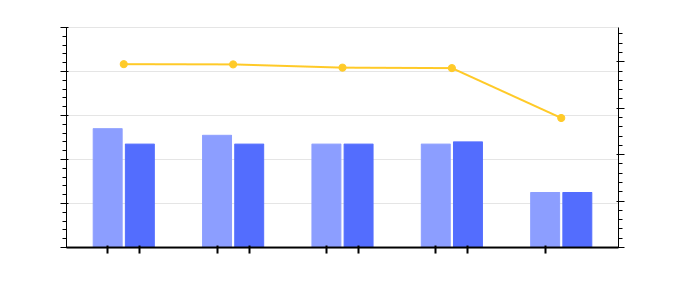

In [30]:
vf.save_plot(p, 'tpr_profit_age')
display(SVG('../static/images/tpr_profit_age.svg'))

## False positive rate (FPR) and profit results for each gender based and fairness intervention 

In [31]:
p = vf.plot_dual_axis_bar_line(
    max_profits_age_group, 
    title="Fraction of defaulters granted a loan by age group and corresponding profit",
    groups_name='IntervationName', 
    bar_target_name_variable0='FalsePositiveRate0', 
    bar_target_name_variable1="FalsePositiveRate1", 
    bar_variables=['+ 40', '< 40'], 
    line_target_name='Profit', 
    left_axis_y_label='Fraction non-defaulters getting loan', 
    right_axis_y_label='Profit')

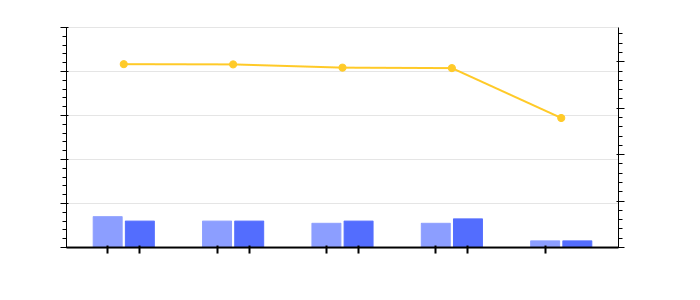

In [32]:
vf.save_plot(p, 'fpr_profit_age')
display(SVG('../static/images/fpr_profit_age.svg'))

## Positive Rate (PR) and profit results for each gender based and fairness intervention 

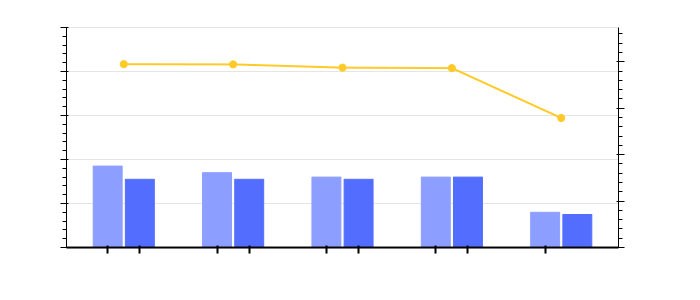

In [33]:
p = vf.plot_dual_axis_bar_line(
    max_profits_age_group, 
    title="Fraction of people granted a loan by age group and corresponding profit",
    groups_name='IntervationName', 
    bar_target_name_variable0='PositiveRate0', 
    bar_target_name_variable1="PositiveRate1", 
    bar_variables=['+ 40', '< 40'], 
    line_target_name='Profit', 
    left_axis_y_label='Fraction non-defaulters getting loan', 
    right_axis_y_label='Profit')

vf.save_plot(p, 'pr_profit_age')
display(SVG('../static/images/pr_profit_age.svg'))

## Negative Rate (NR) and profit results for each gender based and fairness intervention 

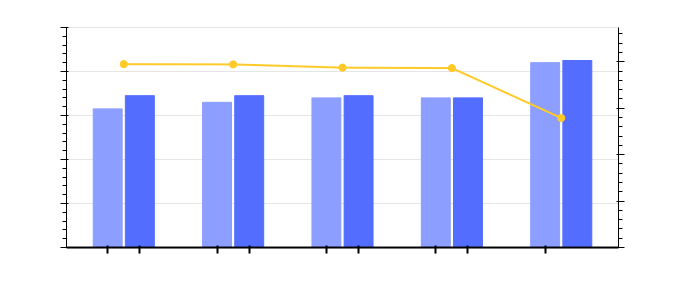

In [34]:
p = vf.plot_dual_axis_bar_line(
    max_profits_age_group, 
    title="Fraction of people not granted a loan by age group and corresponding profit",
    groups_name='IntervationName', 
    bar_target_name_variable0='NegativeRate0', 
    bar_target_name_variable1="NegativeRate1", 
    bar_variables=['+ 40', '< 40'], 
    line_target_name='Profit', 
    left_axis_y_label='Fraction non-defaulters getting loan', 
    right_axis_y_label='Profit')

vf.save_plot(p, 'nr_profit_age')
display(SVG('../static/images/nr_profit_age.svg'))

# Conclusion

This results illustrates how different algorithmic interventions during post-processing can benefit or harm a specific class within a group. For the gender as well as age, we could see equal opportunity as well as equalised odds provided a better balance in prediction accuracy for each class. We believe that equalised odds provides more transparency as it considers equal false positive rates that can be a big burden for groups in credit models. 

# Benefits
The benefits of this type of analysis is that it only requires a simple and efficient analysis after the model has been built. Other approaches make use of complex processes on the model side, which violates the separation between the model building and its auditing. 

This post-processing analysis, do not require models to be modified at any stage. We only require to measure whether unfairness exists and act when this is present by acquiring better data and by challenging how it was initially collected.

# Limitations
The post-processing applied in this case study is an analysis to verify how off the accuracy of predictions for one class may be from another within a group. This basically means that this is a call to consider if by collecting better information for diverse classes, more accurate predictions can be made across groups. This process is therefore not a method that ensures fairness, but rather an analysis to identify unfairness.

Finally, this analysis does not challenge the causal reasoning of the model. The criteria used is simply observational and depends only on the joint distribution of predictor, protected attribute, features, and outcome.